<a href="https://colab.research.google.com/github/yananma/xiangmu/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1、SVM 基本模型

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns 
# sns.set()
%matplotlib inline 

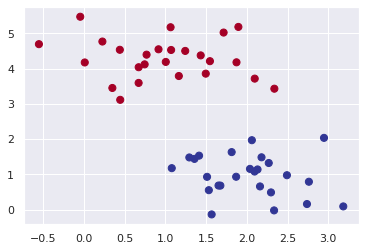

In [9]:
from sklearn.datasets.samples_generator import make_blobs 

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu');

(-1.0, 3.5)

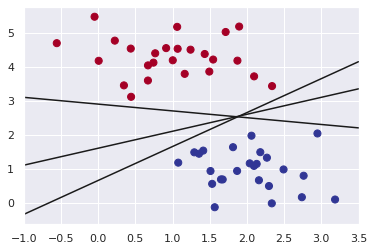

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * fit + b, '-k')
plt.xlim(-1, 3.5)

(-1.0, 3.5)

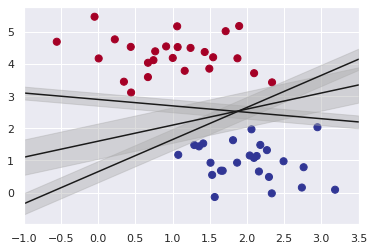

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

In [13]:
from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

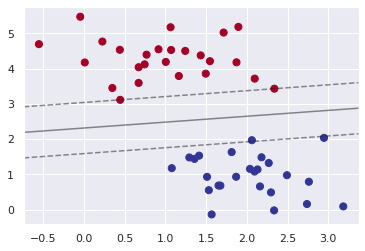

In [18]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
plot_svc_decision_function(model)    

In [19]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

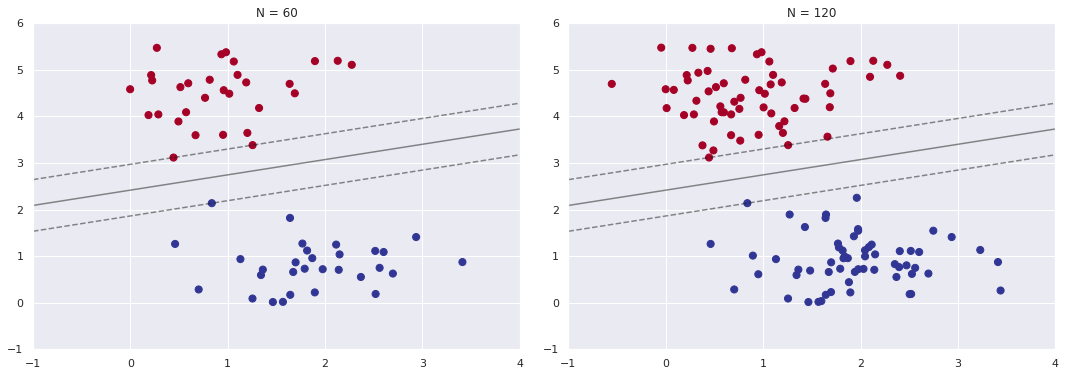

In [24]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## 2、核函数变换

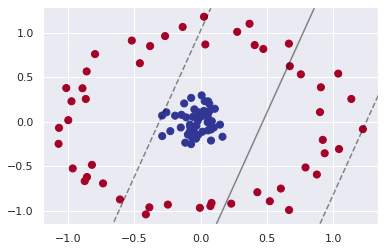

In [27]:
from sklearn.datasets.samples_generator import make_circles 

X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
plot_svc_decision_function(clf, plot_support=False)

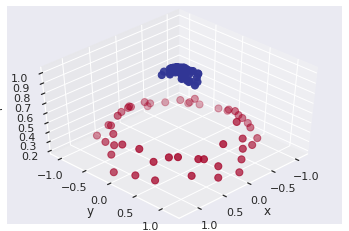

In [30]:
from mpl_toolkits import mplot3d 
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='RdYlBu')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [31]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

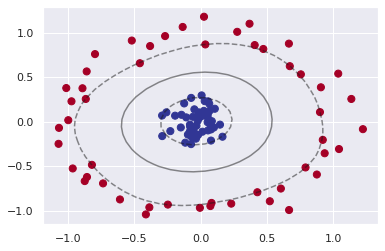

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
plot_svc_decision_function(clf, plot_support=False)

## SVM 参数选择

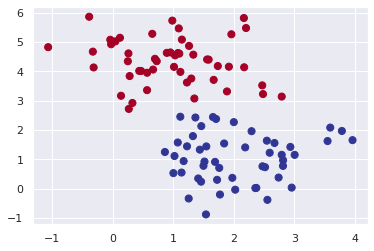

In [33]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')

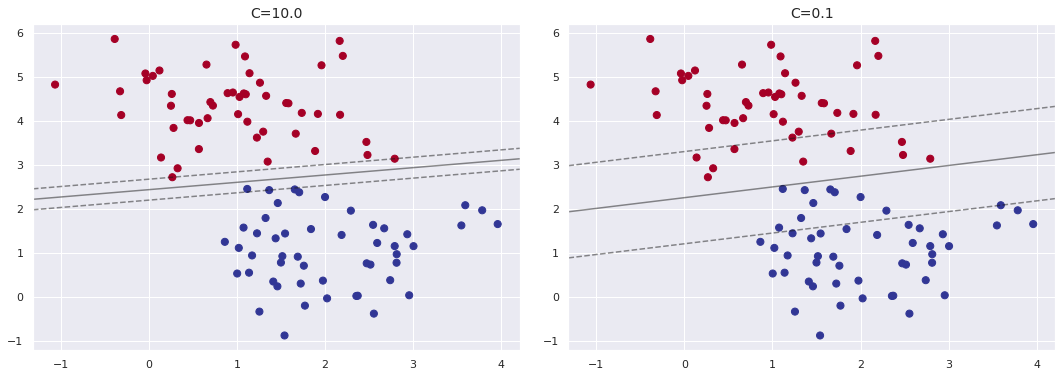

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], 
          model.support_vectors_[:, 1], 
          s=300, lw=1, facecolors='None'); 
    axi.set_title('C={0:.1f}'.format(C), size=14)

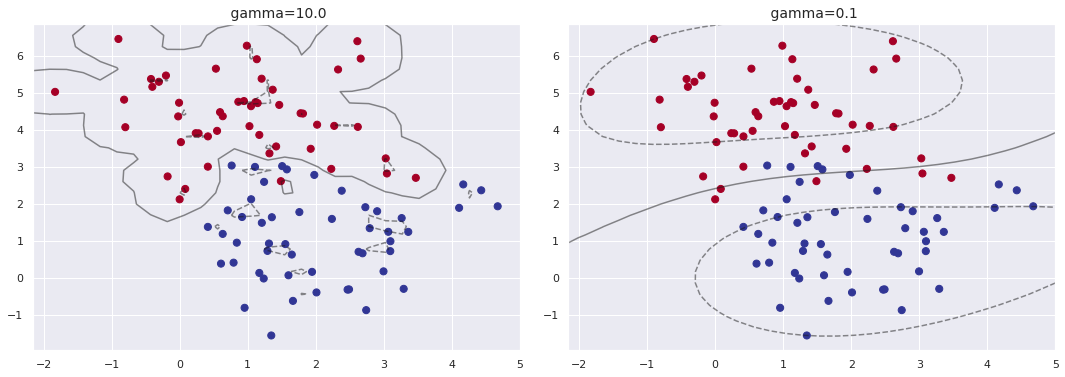

In [47]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.1)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], 
          model.support_vectors_[:, 1], 
          s=300, lw=1, facecolors='None')
    axi.set_title(' gamma={0:.1f}'.format(gamma), size=14)

## 4、SVM 人脸识别实例

In [37]:
from sklearn.datasets import fetch_lfw_people 

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [38]:
print(faces.images.shape)

(1348, 62, 47)


In [39]:
from sklearn.pipeline import make_pipeline 
from sklearn.decomposition import PCA 

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)

In [84]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,test_size=0.25, random_state=40)

In [85]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [5], 
        'gamma': [0.0005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 50.2 s, sys: 8.74 ms, total: 50.2 s
Wall time: 50.3 s
{'C': 5, 'gamma': 0.0005}


In [87]:
model = grid.best_estimator_ 
yfit = model.predict(X_test)
yfit.shape 


(337,)

In [88]:
yfit[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

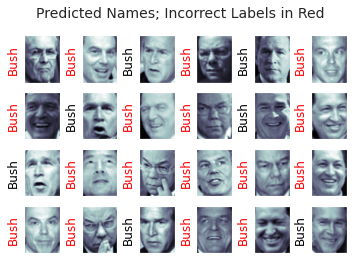

In [89]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat): 
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], 
           color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [62]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.00      0.00      0.00        54
  Donald Rumsfeld       0.00      0.00      0.00        34
    George W Bush       0.40      1.00      0.58       136
Gerhard Schroeder       0.00      0.00      0.00        27
      Hugo Chavez       0.00      0.00      0.00        18
Junichiro Koizumi       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        37

         accuracy                           0.40       337
        macro avg       0.05      0.12      0.07       337
     weighted avg       0.16      0.40      0.23       337



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


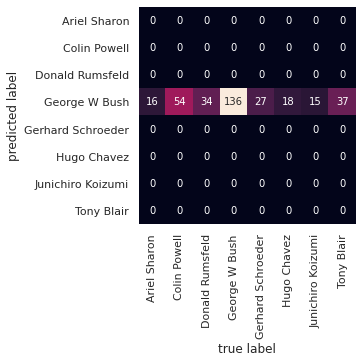

In [67]:
from sklearn.metrics import confusion_matrix 

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
      xticklabels=faces.target_names, 
      yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');